# Kieran (Data Tidying)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
happiness = pd.read_csv("2015.csv")
openness_score = pd.read_csv("countries.csv")

In [6]:
happiness.info()
openness_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
happiness_filtered = happiness[['Country', 'Region',
                                'Happiness Score', 
                                'Economy (GDP per Capita)', 
                                'Standard Error',
                                'Family', 
                                'Health (Life Expectancy)',
                                'Freedom', 
                                'Trust (Government Corruption)', 
                                'Generosity', 'Dystopia Residual']]

In [8]:
openness_score_filtered = openness_score\
[['Country Name', '2015 Score']].copy()
openness_score_filtered.rename\
(columns={'2015 Score': '2015 Openness Score'},\
 inplace=True)

print(happiness_filtered.columns)
print(openness_score_filtered.columns)

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Standard Error', 'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country Name', '2015 Openness Score'], dtype='object')


In [9]:
openness_score_filtered.rename\
(columns={'Country Name': 'Country'},\
 inplace=True)

df_merged = pd.merge(happiness_filtered,\
                     openness_score_filtered,\
                     on='Country')
df_merged.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,2015 Openness Score
0,Switzerland,Western Europe,7.587,1.39651,0.03411,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,47
1,Iceland,Western Europe,7.561,1.30232,0.04884,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,48
2,Denmark,Western Europe,7.527,1.32548,0.03328,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,70
3,Norway,Western Europe,7.522,1.45900,0.03880,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,63
4,Canada,North America,7.427,1.32629,0.03553,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,55


In [10]:
df_merged.sort_values(by='Happiness Score',\
                      ascending=False)

,Country,Region,Happiness Score,Economy (GDP per Capita),Standard Error,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,2015 Openness Score
0,Switzerland,Western Europe,7.587,1.39651,0.03411,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,47
1,Iceland,Western Europe,7.561,1.30232,0.04884,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,48
2,Denmark,Western Europe,7.527,1.32548,0.03328,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,70
3,Norway,Western Europe,7.522,1.45900,0.03880,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,63
4,Canada,North America,7.427,1.32629,0.03553,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,55
...,...,...,...,...,...,...,...,...,...,...,...,...
113,Burkina Faso,Sub-Saharan Africa,3.587,0.25812,0.04324,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,32
114,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.03464,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,38
115,Benin,Sub-Saharan Africa,3.340,0.28665,0.03656,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,30
116,Syria,Middle East and Northern Africa,3.006,0.66320,0.05015,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,5


# Gahyun Ann (Analyzing relationships)

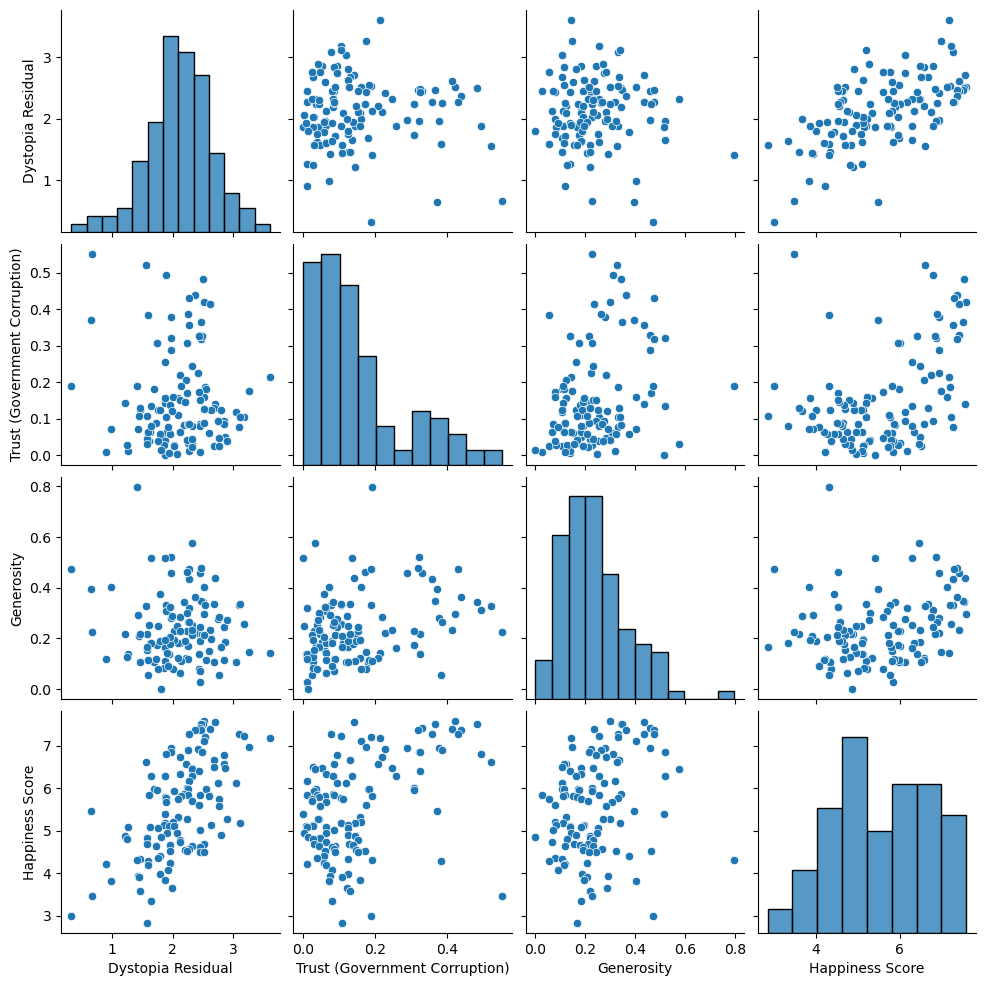

In [11]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df_merged[['Dystopia Residual',\
                        'Trust (Government Corruption)',\
                        'Generosity', 'Happiness Score']])
plt.show()

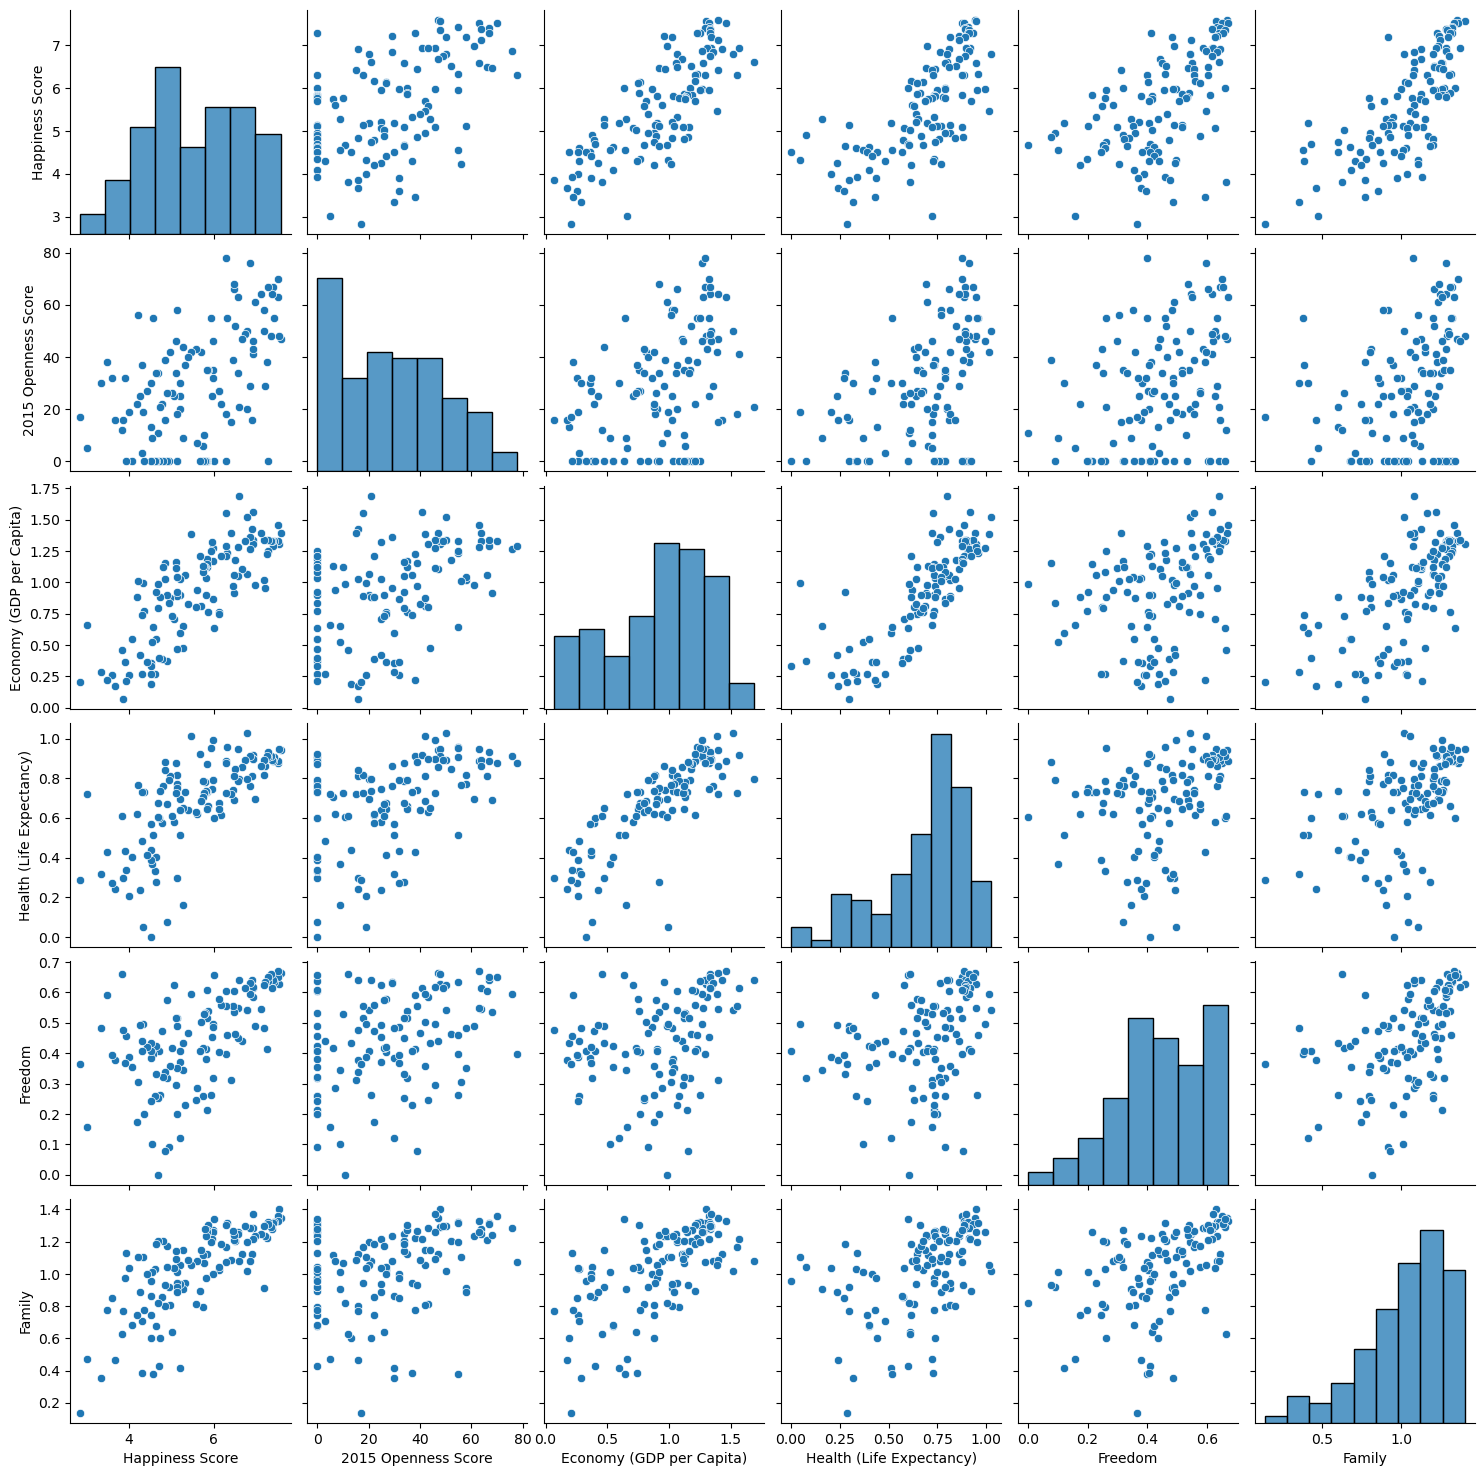

In [12]:
sns.pairplot(df_merged[['Happiness Score', '2015 Openness Score',\
                        'Economy (GDP per Capita)',\
                        'Health (Life Expectancy)',\
                        'Freedom','Family']])
plt.show()

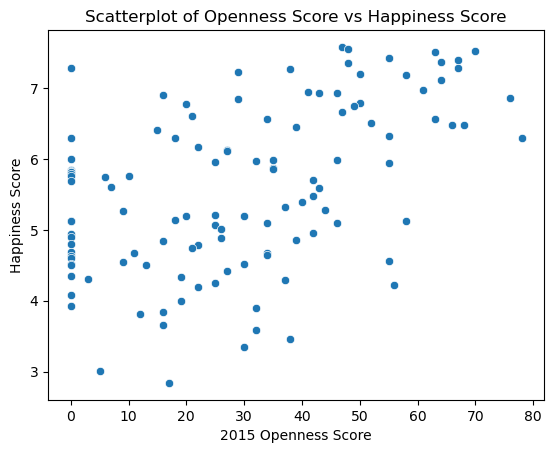

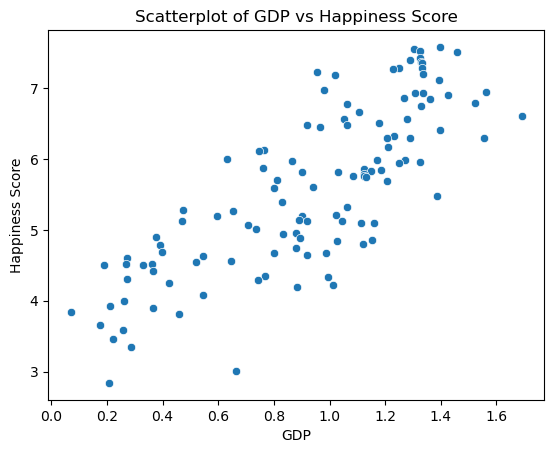

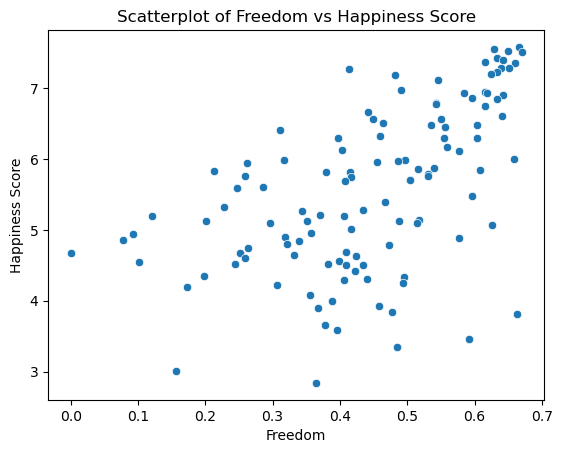

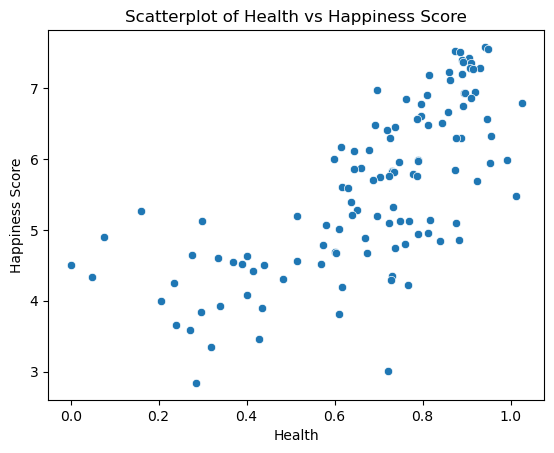

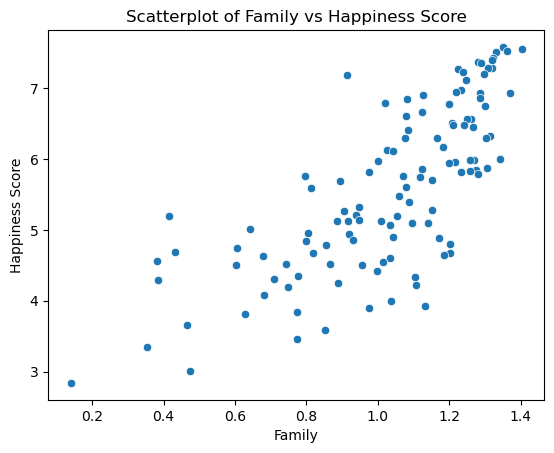

In [13]:
sns.scatterplot(x='2015 Openness Score', y='Happiness Score',\
                data=df_merged)
plt.title('Scatterplot of Openness Score vs Happiness Score')
plt.xlabel('2015 Openness Score')
plt.ylabel('Happiness Score')
plt.show()


sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score',\
                data=df_merged)
plt.title('Scatterplot of GDP vs Happiness Score')
plt.xlabel('GDP')
plt.ylabel('Happiness Score')
plt.show()


sns.scatterplot(x='Freedom', y='Happiness Score',\
                data=df_merged)
plt.title('Scatterplot of Freedom vs Happiness Score')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()


sns.scatterplot(x='Health (Life Expectancy)',\
                y='Happiness Score', data=df_merged)
plt.title('Scatterplot of Health vs Happiness Score')
plt.xlabel('Health')
plt.ylabel('Happiness Score')
plt.show()


sns.scatterplot(x='Family', y='Happiness Score',\
                data=df_merged)
plt.title('Scatterplot of Family vs Happiness Score')
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

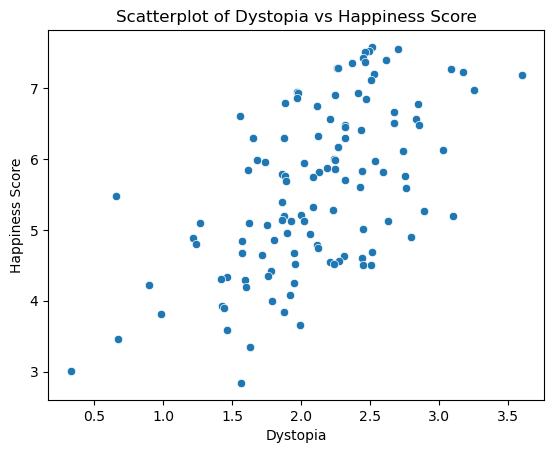

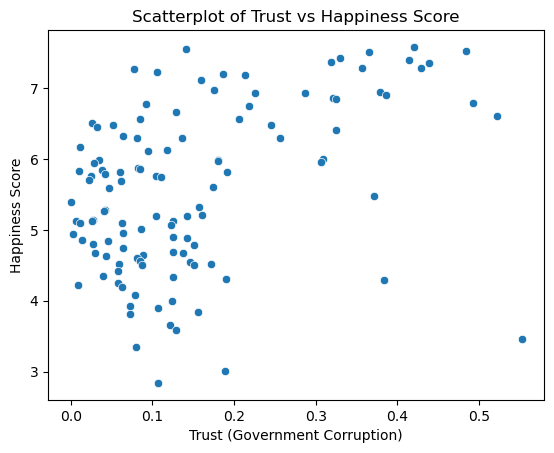

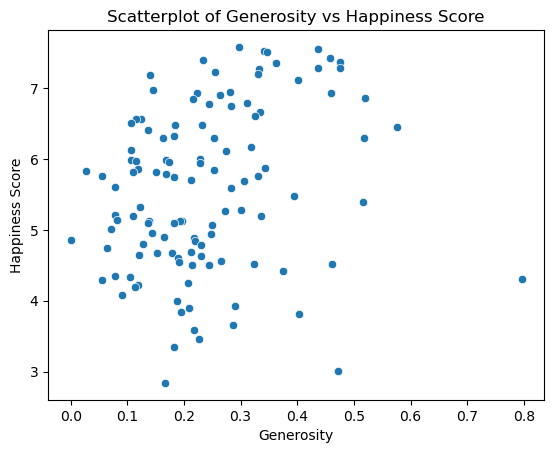

In [14]:
sns.scatterplot(x='Dystopia Residual', y='Happiness Score',\
                data=df_merged)
plt.title('Scatterplot of Dystopia vs Happiness Score')
plt.xlabel('Dystopia')
plt.ylabel('Happiness Score')
plt.show()

sns.scatterplot(x='Trust (Government Corruption)',\
                y='Happiness Score', data=df_merged)
plt.title('Scatterplot of Trust vs Happiness Score')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.show()

sns.scatterplot(x='Generosity', y='Happiness Score',\
                data=df_merged)
plt.title('Scatterplot of Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

# Younggyun Kim (Function - 1)

In [15]:
list_countries = df_merged['Country'].tolist()
print(list_countries)

['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel', 'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil', 'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates', 'United Kingdom', 'Oman', 'Singapore', 'Panama', 'Germany', 'Chile', 'Qatar', 'France', 'Argentina', 'Czech Republic', 'Uruguay', 'Colombia', 'Thailand', 'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan', 'Slovakia', 'Japan', 'Ecuador', 'Bahrain', 'Italy', 'Paraguay', 'Kazakhstan', 'Slovenia', 'Lithuania', 'Peru', 'Belarus', 'Poland', 'Malaysia', 'Croatia', 'Libya', 'Jamaica', 'Cyprus', 'Algeria', 'Kosovo', 'Hong Kong', 'Indonesia', 'Turkey', 'Kyrgyzstan', 'Nigeria', 'Azerbaijan', 'Pakistan', 'Jordan', 'China', 'Zambia', 'Romania', 'Serbia', 'Portugal', 'Latvia', 'Philippines', 'Morocco', 'Albania', 'Bosnia and Herzegovina', 'Lesotho', 'Dominican Republic', 'Greece', 'L

In [16]:
len(list_countries)

118

In [17]:
def get_country_regions(list_countries, dataframe):
    
    """
    This function takes a list of countries\
    and a dataframe, and returns a dictionary
    with the country as the key and the region\
    as the value.
    
    Parameters:
    list_countries (list): List of country names
    dataframe (pd.DataFrame): Dataframe containing\
    country and region information
    
    Returns:
    dict: Dictionary with country names as keys\
    and regions as values
    """
    country_region_dict = {}
    for country in list_countries:
        region = dataframe\
        [dataframe['Country'] == country]['Region']
        if not region.empty:
            country_region_dict[country] = region.values[0]
        else:
            country_region_dict[country] = 'Region not found'
    return country_region_dict

country_regions = get_country_regions(list_countries, df_merged)

for country, region in country_regions.items():
    print(f"{country}: {region}")

Switzerland: Western Europe
Iceland: Western Europe
Denmark: Western Europe
Norway: Western Europe
Canada: North America
Finland: Western Europe
Netherlands: Western Europe
Sweden: Western Europe
New Zealand: Australia and New Zealand
Australia: Australia and New Zealand
Israel: Middle East and Northern Africa
Costa Rica: Latin America and Caribbean
Austria: Western Europe
Mexico: Latin America and Caribbean
United States: North America
Brazil: Latin America and Caribbean
Luxembourg: Western Europe
Ireland: Western Europe
Belgium: Western Europe
United Arab Emirates: Middle East and Northern Africa
United Kingdom: Western Europe
Oman: Middle East and Northern Africa
Singapore: Southeastern Asia
Panama: Latin America and Caribbean
Germany: Western Europe
Chile: Latin America and Caribbean
Qatar: Middle East and Northern Africa
France: Western Europe
Argentina: Latin America and Caribbean
Czech Republic: Central and Eastern Europe
Uruguay: Latin America and Caribbean
Colombia: Latin Amer

In [18]:
region_country_dict = {}

for country, region in country_regions.items():
    if region in region_country_dict:
        region_country_dict[region].append(country)
    else:
        region_country_dict[region] = [country]

for region in region_country_dict:
    region_country_dict[region] = np.array(region_country_dict[region])


for region, countries in region_country_dict.items():
    print(f"{region}: {countries}")

Western Europe: ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Finland' 'Netherlands'
 'Sweden' 'Austria' 'Luxembourg' 'Ireland' 'Belgium' 'United Kingdom'
 'Germany' 'France' 'Spain' 'Malta' 'Italy' 'Cyprus' 'Portugal' 'Greece']
North America: ['Canada' 'United States']
Australia and New Zealand: ['New Zealand' 'Australia']
Middle East and Northern Africa: ['Israel' 'United Arab Emirates' 'Oman' 'Qatar' 'Saudi Arabia' 'Kuwait'
 'Bahrain' 'Libya' 'Algeria' 'Turkey' 'Jordan' 'Morocco' 'Lebanon'
 'Tunisia' 'Iraq' 'Egypt' 'Yemen' 'Syria']
Latin America and Caribbean: ['Costa Rica' 'Mexico' 'Brazil' 'Panama' 'Chile' 'Argentina' 'Uruguay'
 'Colombia' 'Trinidad and Tobago' 'El Salvador' 'Guatemala' 'Ecuador'
 'Paraguay' 'Peru' 'Jamaica' 'Dominican Republic' 'Haiti']
Southeastern Asia: ['Singapore' 'Thailand' 'Malaysia' 'Indonesia' 'Philippines' 'Myanmar'
 'Cambodia']
Central and Eastern Europe: ['Czech Republic' 'Uzbekistan' 'Slovakia' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Belarus' 'Poland' 'C

In [19]:
region_openness_dict = {}

for region, countries in region_country_dict.items():
    openness_scores = df_merged[df_merged['Country'].isin(countries)]\
    ['2015 Openness Score'].tolist()
    region_openness_dict[region] = openness_scores

for region, openness_scores in region_openness_dict.items():
    print(f"{region} = {openness_scores}")

Western Europe = [47, 48, 70, 63, 67, 64, 48, 50, 41, 46, 43, 76, 49, 63, 55, 0, 55, 0, 34, 39]
North America = [55, 64]
Australia and New Zealand = [0, 67]
Middle East and Northern Africa = [38, 16, 29, 21, 15, 18, 25, 6, 7, 37, 20, 26, 16, 21, 11, 22, 0, 5]
Latin America and Caribbean = [29, 58, 61, 20, 47, 34, 66, 68, 22, 27, 27, 32, 35, 0, 42, 26, 0]
Southeastern Asia = [50, 39, 10, 40, 25, 3, 12]
Central and Eastern Europe = [52, 0, 35, 35, 0, 0, 0, 0, 0, 43, 44, 25, 58, 0, 46, 42, 0, 0, 22, 34, 0, 37, 56]
Eastern Asia = [78, 46, 42, 18]
Sub-Saharan Africa = [9, 0, 0, 34, 0, 0, 9, 13, 0, 27, 19, 25, 19, 0, 32, 16, 16, 32, 38, 30, 17]
Southern Asia = [30, 0, 55, 30]


In [20]:
region_gdp_dict = {}

for region, countries in region_country_dict.items():
    GDP = df_merged[df_merged['Country'].isin(countries)]\
    ['Economy (GDP per Capita)'].tolist()
    region_gdp_dict[region] = [round(gdp, 2) for gdp in GDP]

for region, GDP in region_gdp_dict.items():
    print(f"{region} = {GDP}")
    

Western Europe = [1.4, 1.3, 1.33, 1.46, 1.29, 1.33, 1.33, 1.34, 1.56, 1.34, 1.31, 1.27, 1.33, 1.28, 1.23, 1.21, 1.25, 1.21, 1.16, 1.15]
North America = [1.33, 1.39]
Australia and New Zealand = [1.25, 1.33]
Middle East and Northern Africa = [1.23, 1.43, 1.36, 1.69, 1.4, 1.55, 1.32, 1.13, 0.94, 1.06, 0.9, 0.73, 1.03, 0.88, 0.99, 0.88, 0.55, 0.66]
Latin America and Caribbean = [0.96, 1.02, 0.98, 1.06, 1.11, 1.05, 1.06, 0.92, 1.21, 0.76, 0.75, 0.86, 0.76, 0.9, 0.81, 0.9, 0.27]
Southeastern Asia = [1.52, 0.97, 1.12, 0.83, 0.71, 0.27, 0.46]
Central and Eastern Europe = [1.18, 0.63, 1.17, 1.12, 1.18, 1.15, 1.03, 1.13, 1.08, 0.8, 0.47, 1.02, 1.04, 0.92, 1.11, 0.88, 0.83, 1.12, 0.39, 0.8, 0.77, 0.74, 1.01]
Eastern Asia = [1.29, 1.27, 1.39, 0.89]
Sub-Saharan Africa = [0.65, 0.47, 0.38, 0.92, 0.55, 0.27, 0.52, 0.19, 0.33, 0.36, 0.99, 0.42, 0.26, 0.21, 0.36, 0.07, 0.17, 0.26, 0.22, 0.29, 0.21]
Southern Asia = [0.6, 0.4, 0.64, 0.36]


In [21]:
region_freedom_dict = {}

for region, countries in region_country_dict.items():
    Freedom = df_merged[df_merged['Country'].isin(countries)]\
    ['Freedom'].tolist()
    region_freedom_dict[region] = [round(freedom, 2)\
                                   for freedom in Freedom]

for region, Freedom in region_freedom_dict.items():
    print(f"{region} = {Freedom}")

Western Europe = [0.67, 0.63, 0.65, 0.67, 0.64, 0.62, 0.66, 0.62, 0.62, 0.62, 0.58, 0.6, 0.61, 0.55, 0.46, 0.6, 0.26, 0.41, 0.51, 0.08]
North America = [0.63, 0.55]
Australia and New Zealand = [0.64, 0.65]
Middle East and Northern Africa = [0.41, 0.64, 0.63, 0.64, 0.31, 0.55, 0.45, 0.42, 0.29, 0.23, 0.41, 0.42, 0.34, 0.26, 0.0, 0.17, 0.36, 0.16]
Latin America and Caribbean = [0.63, 0.48, 0.49, 0.54, 0.44, 0.45, 0.6, 0.53, 0.56, 0.4, 0.58, 0.49, 0.54, 0.41, 0.5, 0.58, 0.24]
Southeastern Asia = [0.54, 0.56, 0.53, 0.47, 0.63, 0.44, 0.66]
Central and Eastern Europe = [0.46, 0.66, 0.32, 0.52, 0.61, 0.21, 0.38, 0.53, 0.26, 0.25, 0.43, 0.37, 0.35, 0.2, 0.3, 0.36, 0.09, 0.32, 0.47, 0.25, 0.2, 0.41, 0.31]
Eastern Asia = [0.4, 0.5, 0.6, 0.52]
Sub-Saharan Africa = [0.34, 0.49, 0.32, 0.33, 0.42, 0.26, 0.1, 0.43, 0.41, 0.42, 0.49, 0.49, 0.39, 0.46, 0.37, 0.48, 0.38, 0.39, 0.59, 0.48, 0.36]
Southern Asia = [0.12, 0.41, 0.4, 0.38]


# Woohyun Song (Function - 2 & Visualization - 1)

In [22]:
region_health_dict = {}

for region, countries in region_country_dict.items():
    Health = df_merged[df_merged['Country'].isin(countries)]\
    ['Health (Life Expectancy)'].tolist()
    region_health_dict[region] = [round(health, 2)\
                                  for health in Health]

for region, Health in region_health_dict.items():
    print(f"{region} = {Health}")

Western Europe = [0.94, 0.95, 0.87, 0.89, 0.89, 0.89, 0.91, 0.89, 0.92, 0.9, 0.9, 0.91, 0.89, 0.95, 0.96, 0.89, 0.95, 0.92, 0.88, 0.88]
North America = [0.91, 0.86]
Australia and New Zealand = [0.91, 0.93]
Middle East and Northern Africa = [0.91, 0.81, 0.76, 0.8, 0.72, 0.72, 0.75, 0.7, 0.62, 0.73, 0.7, 0.61, 0.84, 0.74, 0.6, 0.62, 0.4, 0.72]
Latin America and Caribbean = [0.86, 0.81, 0.7, 0.8, 0.86, 0.79, 0.81, 0.69, 0.61, 0.68, 0.64, 0.79, 0.66, 0.73, 0.69, 0.67, 0.39]
Southeastern Asia = [1.03, 0.74, 0.72, 0.64, 0.58, 0.48, 0.61]
Central and Eastern Europe = [0.84, 0.6, 0.79, 0.64, 0.87, 0.73, 0.74, 0.78, 0.79, 0.63, 0.65, 0.64, 0.77, 0.75, 0.72, 0.81, 0.79, 0.76, 0.57, 0.67, 0.73, 0.73, 0.77]
Eastern Asia = [0.88, 0.99, 1.01, 0.82]
Sub-Saharan Africa = [0.16, 0.3, 0.08, 0.28, 0.4, 0.33, 0.37, 0.44, 0.0, 0.41, 0.05, 0.23, 0.21, 0.34, 0.44, 0.3, 0.24, 0.27, 0.43, 0.32, 0.28]
Southern Asia = [0.51, 0.6, 0.52, 0.57]


In [23]:
region_family_dict = {}

for region, countries in region_country_dict.items():
    Family = df_merged[df_merged['Country'].isin(countries)]\
    ['Family'].tolist()
    region_family_dict[region] = [round(family, 2)\
                                  for family in Family]

for region, Family in region_family_dict.items():
    print(f"{region} = {Family}")

Western Europe = [1.35, 1.4, 1.36, 1.33, 1.32, 1.28, 1.29, 1.3, 1.22, 1.37, 1.29, 1.29, 1.3, 1.26, 1.31, 1.3, 1.2, 0.89, 1.14, 0.93]
North America = [1.32, 1.25]
Australia and New Zealand = [1.32, 1.31]
Middle East and Northern Africa = [1.22, 1.13, 1.08, 1.08, 1.08, 1.17, 1.22, 1.12, 1.08, 0.95, 1.05, 0.64, 0.8, 0.6, 0.82, 0.75, 0.68, 0.47]
Latin America and Caribbean = [1.24, 0.91, 1.23, 1.2, 1.12, 1.25, 1.21, 1.24, 1.18, 1.03, 1.04, 1.0, 1.3, 0.97, 1.15, 1.17, 0.74]
Southeastern Asia = [1.02, 1.27, 1.07, 1.09, 1.04, 0.71, 0.63]
Central and Eastern Europe = [1.21, 1.34, 1.27, 1.12, 1.27, 1.26, 1.23, 1.28, 0.8, 0.81, 1.15, 0.94, 0.89, 1.01, 1.1, 0.8, 0.92, 1.2, 0.86, 1.2, 0.78, 0.39, 1.11]
Eastern Asia = [1.08, 1.26, 1.06, 0.95]
Sub-Saharan Africa = [0.9, 0.92, 1.04, 1.18, 0.68, 1.03, 1.01, 0.6, 0.96, 1.0, 1.1, 0.89, 1.04, 1.13, 0.98, 0.77, 0.46, 0.85, 0.77, 0.35, 0.14]
Southern Asia = [0.41, 0.43, 0.38, 0.86]


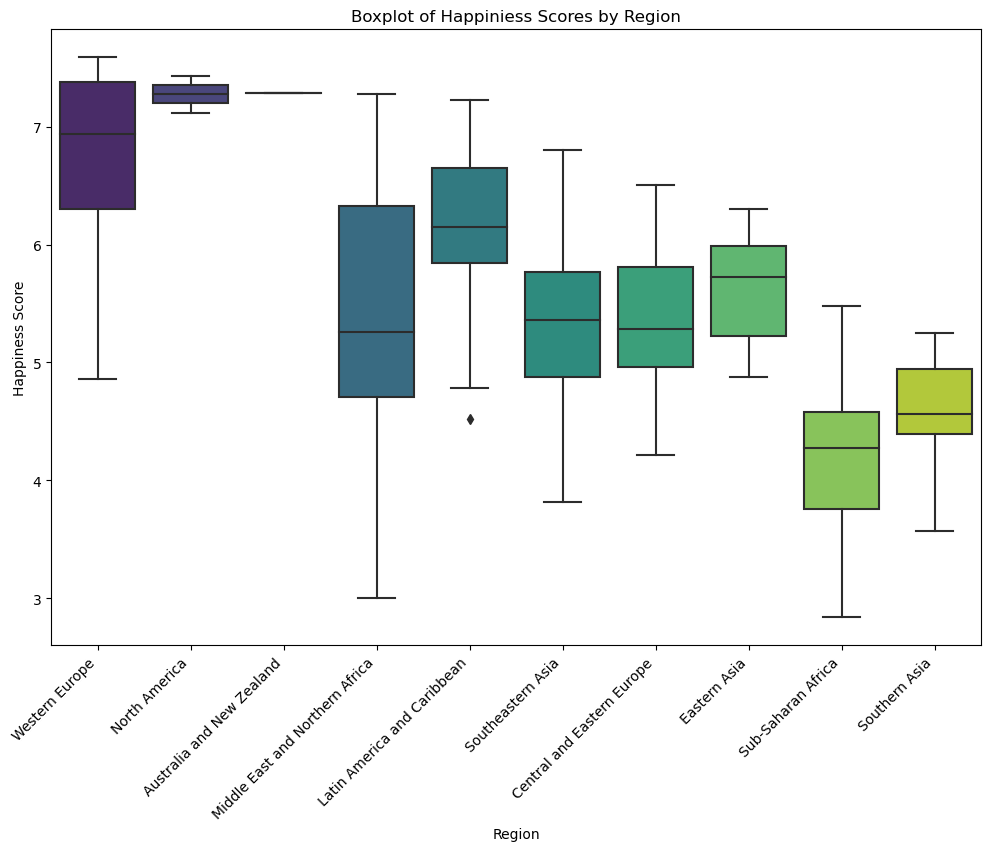

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Happiness Score', data=happiness,
            palette='viridis')
plt.title('Boxplot of Happiniess Scores by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.show()

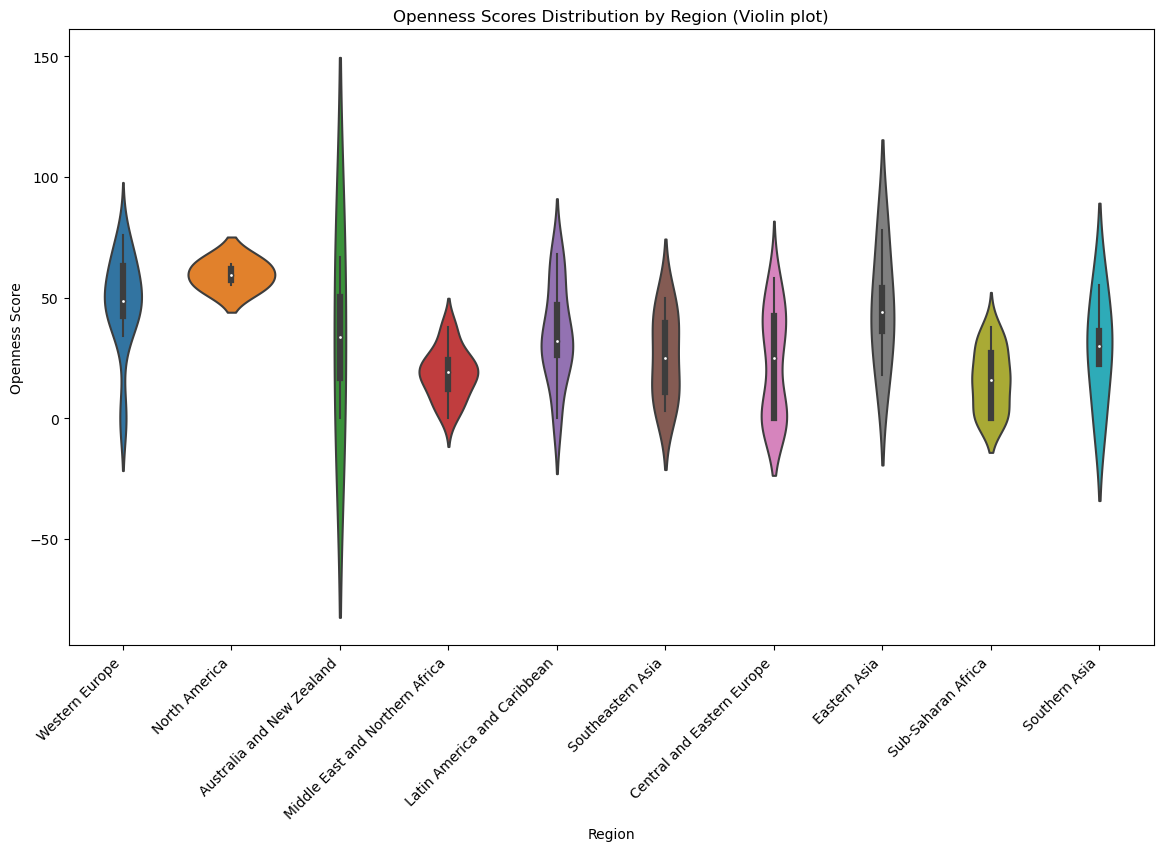

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


region_openness_df = pd.DataFrame(dict([(k, pd.Series(v))\
                                        for k, v\
                                        in region_openness_dict.items()]))
region_openness_df = region_openness_df.melt(var_name='Region',\
                                             value_name='Openness Score')


plt.figure(figsize=(14, 8))
sns.violinplot(x='Region', y='Openness Score', data=region_openness_df)
plt.xticks(rotation=45, ha='right')
plt.title('Openness Scores Distribution by Region (Violin plot)')
plt.xlabel('Region')
plt.ylabel('Openness Score')
plt.show()


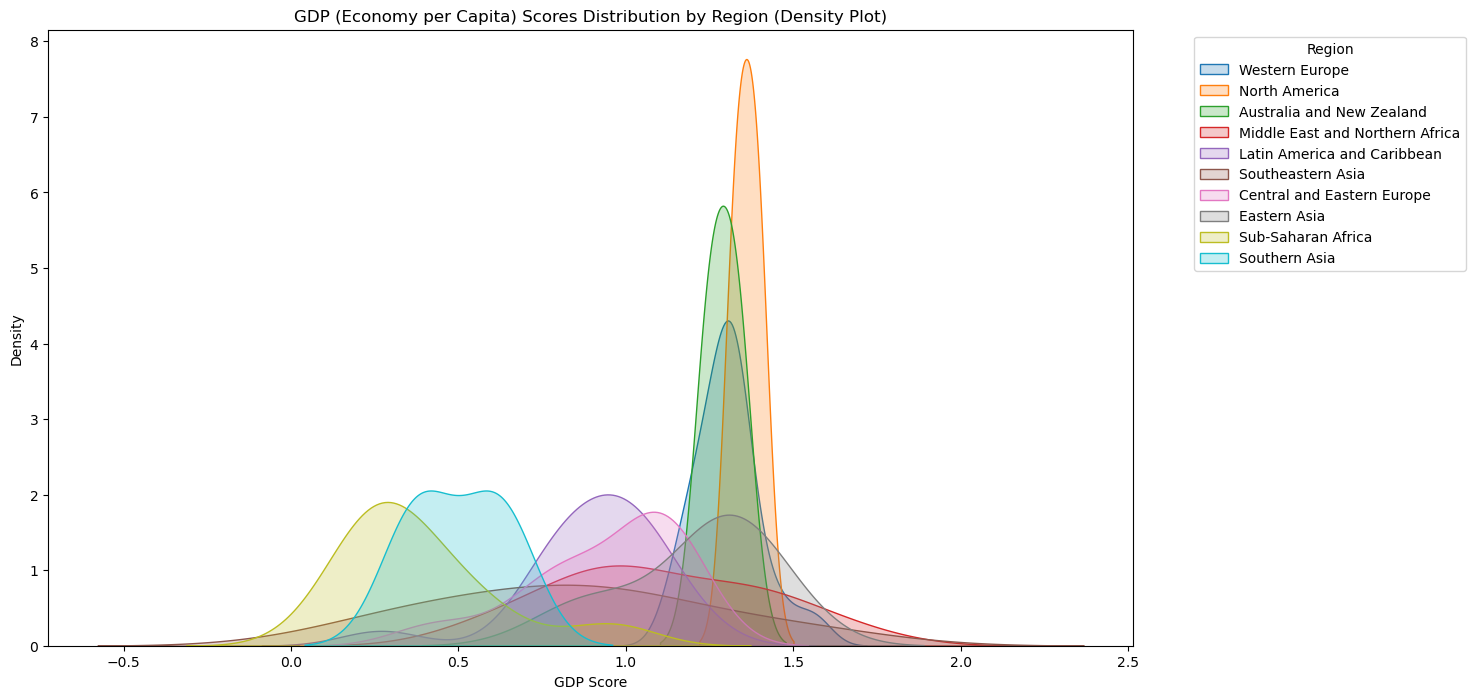

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

region_gdp_df = pd.DataFrame(dict([(k, pd.Series(v))\
                                   for k, v\
                                   in region_gdp_dict.items()]))
region_gdp_df = region_gdp_df.melt(var_name='Region',\
                                   value_name='GDP Score')

plt.figure(figsize=(14, 8))

for region in region_gdp_df['Region'].unique():
    subset = region_gdp_df[region_gdp_df['Region'] == region]
    sns.kdeplot(subset['GDP Score'], label=region, shade=True)

plt.title('GDP (Economy per Capita) Scores Distribution \
by Region (Density Plot)')
plt.xlabel('GDP Score')
plt.ylabel('Density')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Jiwon Park (Visualization - 2)

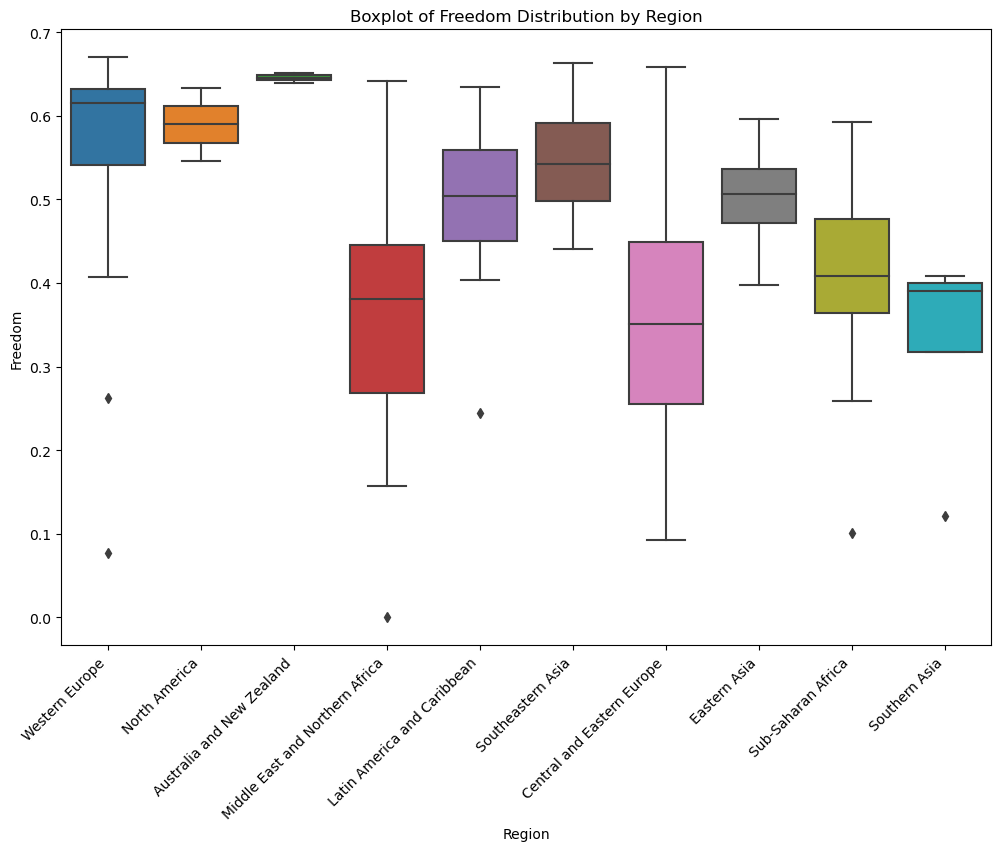

In [25]:
region_freedom_scores = {}

for region, countries in region_country_dict.items():
    freedom_scores = df_merged[df_merged['Country'].isin(countries)]\
    ['Freedom'].tolist()
    region_freedom_scores[region] = freedom_scores

data = []
for region, scores in region_freedom_scores.items():
    for score in scores:
        data.append((region, score))

df_freedom_scores = pd.DataFrame(data, columns=['Region', 'Freedom'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Freedom', data=df_freedom_scores)
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot of Freedom Distribution by Region')
plt.show()


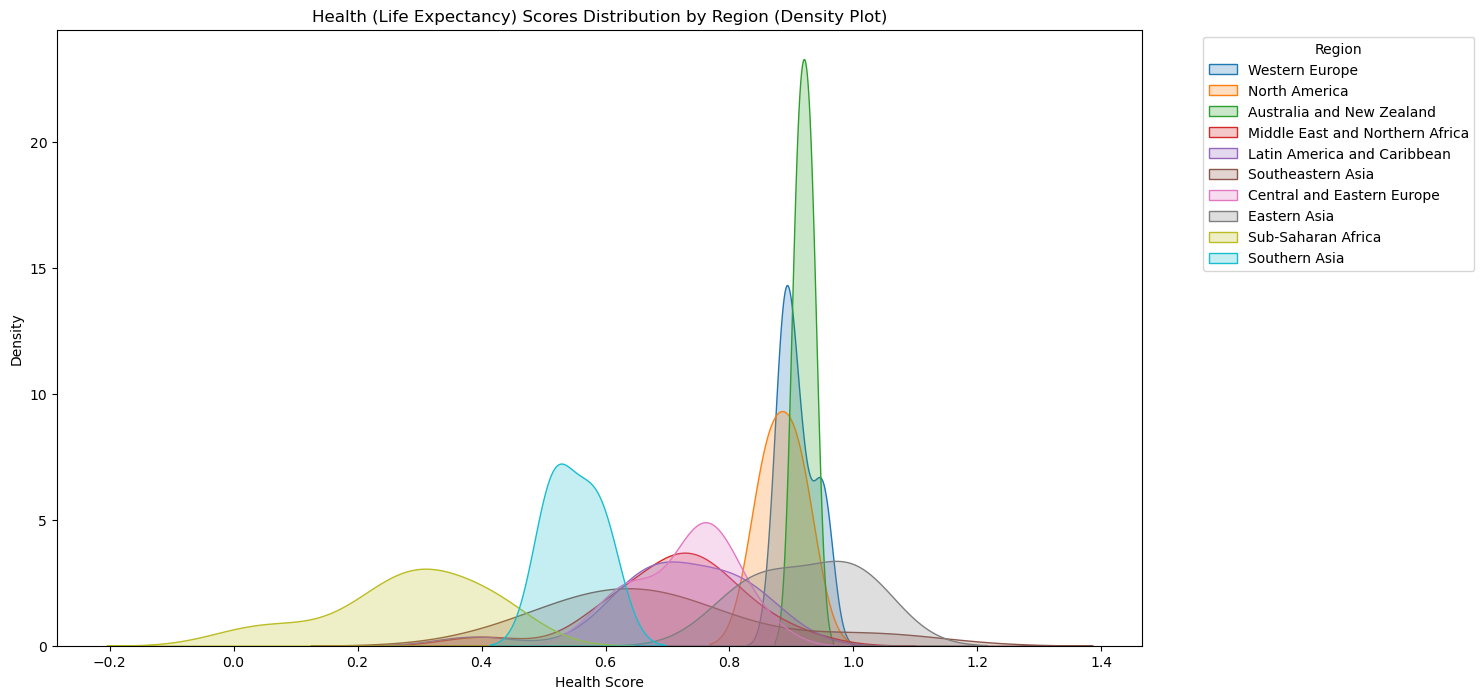

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

region_health_df = pd.DataFrame(dict([(k, pd.Series(v))\
                                      for k, v\
                                      in region_health_dict.items()]))
region_health_df = region_health_df.melt(var_name='Region',\
                                         value_name='Health Score')

plt.figure(figsize=(14, 8))

for region in region_health_df['Region'].unique():
    subset = region_health_df[region_health_df['Region'] == region]
    sns.kdeplot(subset['Health Score'], label=region,\
                shade=True)

plt.title('Health (Life Expectancy) Scores Distribution \
by Region (Density Plot)')
plt.xlabel('Health Score')
plt.ylabel('Density')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


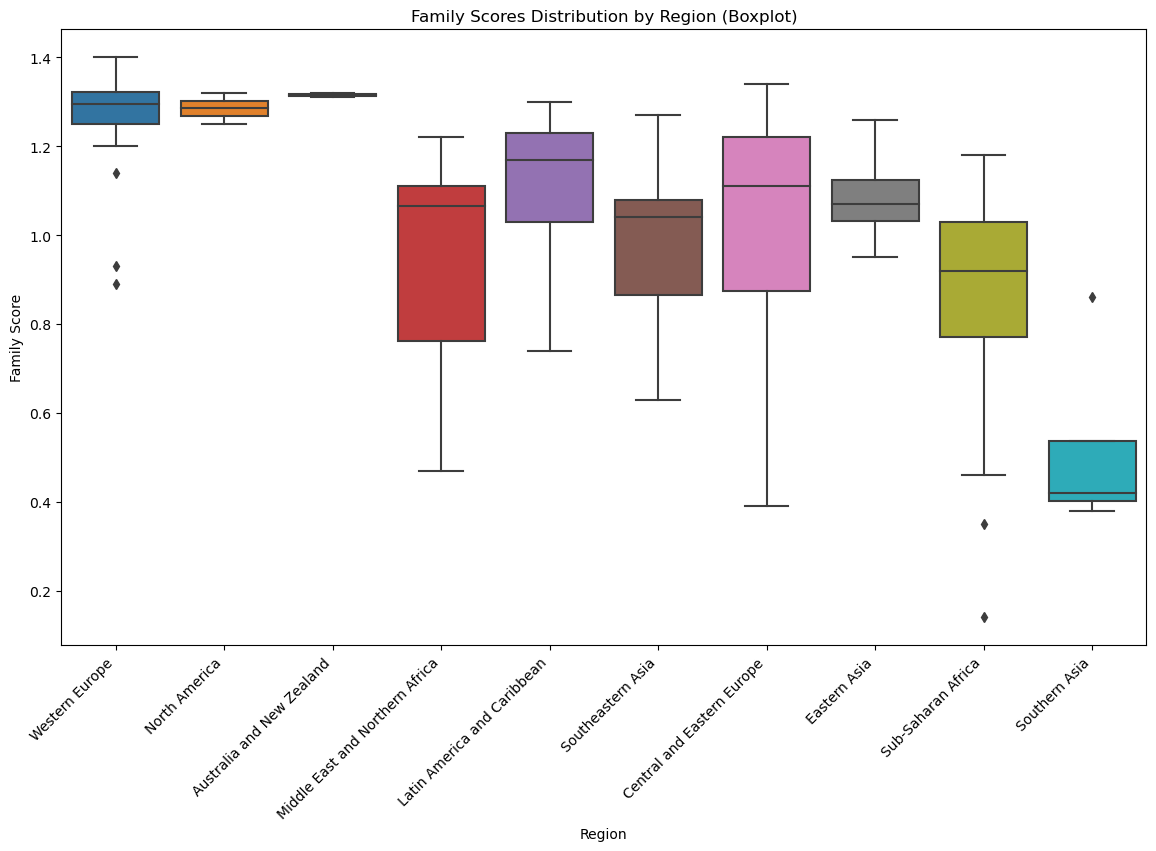

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


region_family_df = pd.DataFrame(dict([(k, pd.Series(v))\
                                      for k, v in\
                                      region_family_dict.items()]))
region_family_df = region_family_df.melt(var_name='Region',\
                                         value_name='Family Score')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='Family Score', data=region_family_df)
plt.xticks(rotation=45, ha='right')
plt.title('Family Scores Distribution by Region (Boxplot)')
plt.xlabel('Region')
plt.ylabel('Family Score')
plt.show()


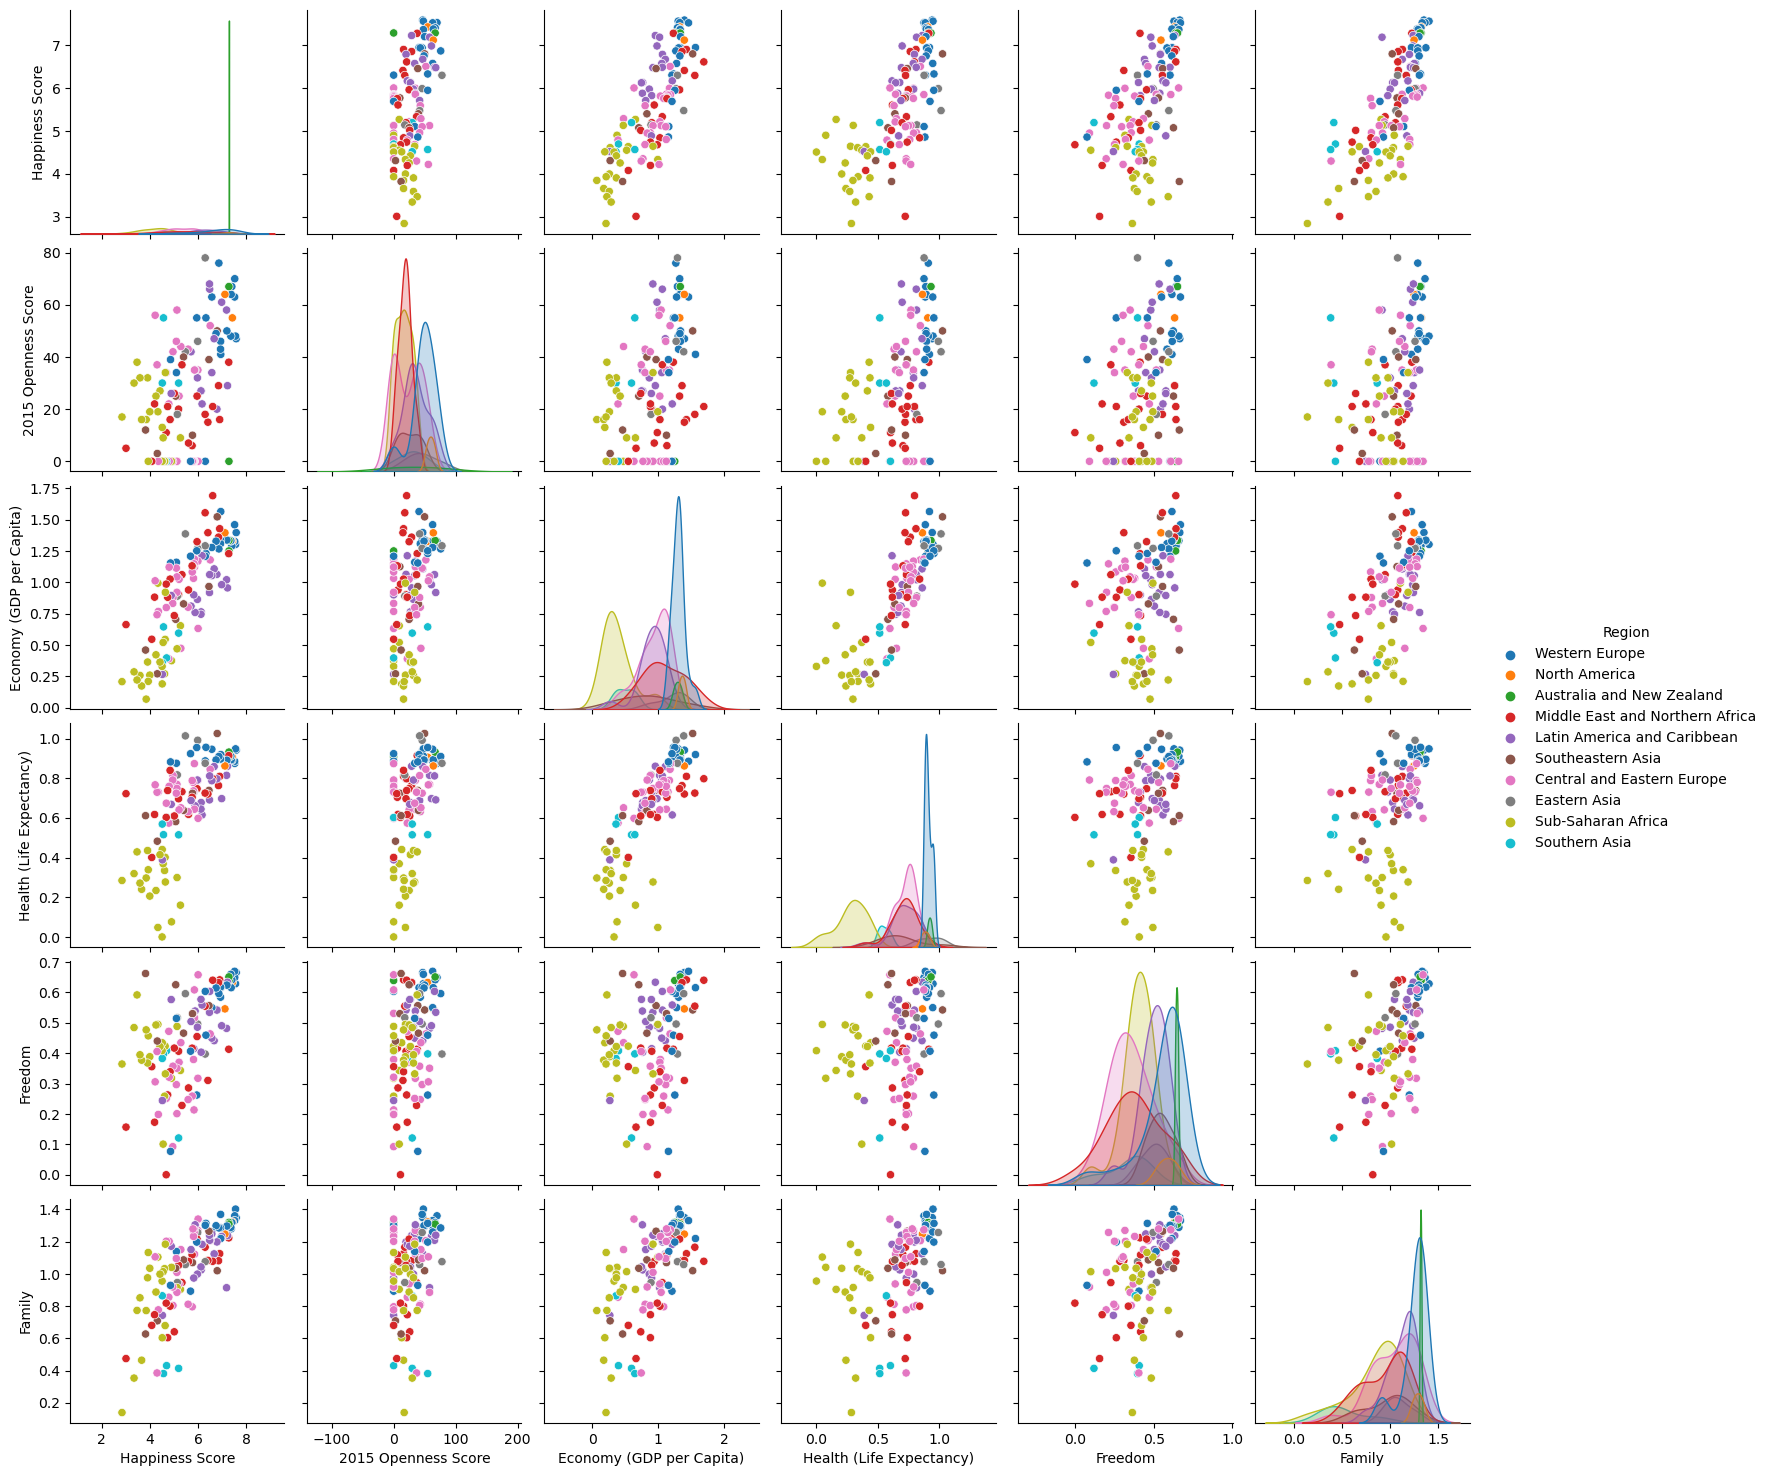

In [30]:
# create a pairplot to visualize relationships between multiple variables
sns.pairplot(df_merged[['Region','Happiness Score', '2015 Openness Score',\
                        'Economy (GDP per Capita)',\
                        'Health (Life Expectancy)',\
                        'Freedom','Family']],hue='Region')

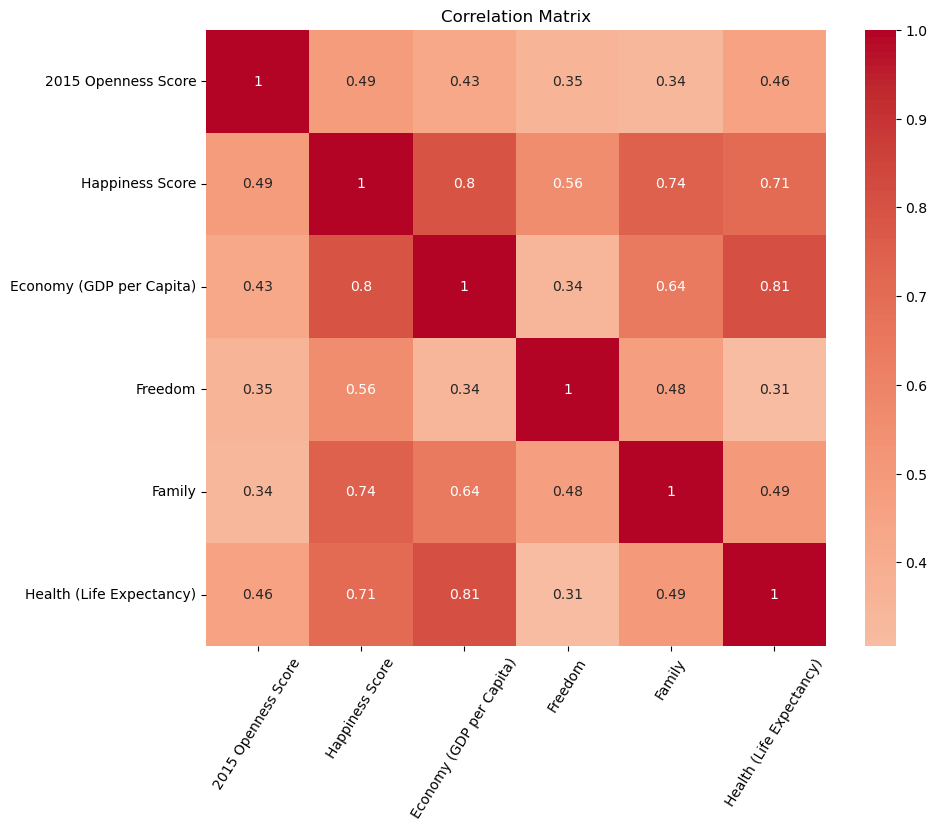

In [39]:
corr_matrix = df_merged[['2015 Openness Score', 
                         'Happiness Score', 
                         'Economy (GDP per Capita)', 
                         'Freedom','Family', 
                         'Health (Life Expectancy)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.xticks(rotation=58)
plt.show()

# Yoonjoo Lee (Regression)

Happiness Score             1.000000
Economy (GDP per Capita)    0.796395
Family                      0.744426
Health (Life Expectancy)    0.709050
Freedom                     0.556736
2015 Openness Score         0.490999
Name: Happiness Score, dtype: float64


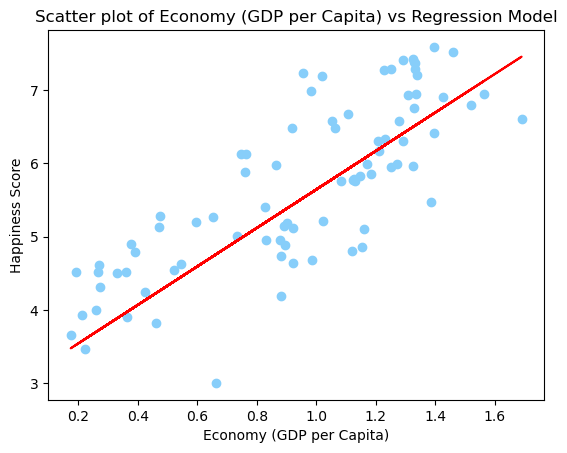

For variable Economy (GDP per Capita):
Intercept: 3.0208871220917133
Slope: [2.62256319]
R-squared: 0.5889846964427644
RMSE: 0.7230235809781854
--------------------------------------------------


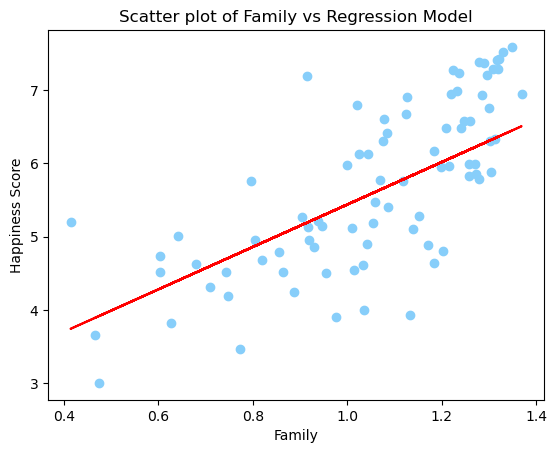

For variable Family:
Intercept: 2.547402747094303
Slope: [2.89053141]
R-squared: 0.5115454054674787
RMSE: 0.7881984292469114
--------------------------------------------------


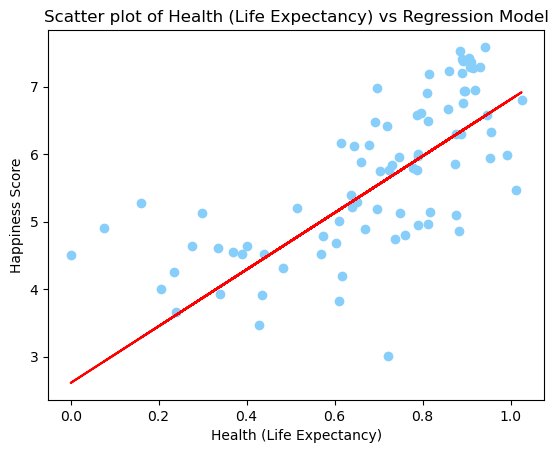

For variable Health (Life Expectancy):
Intercept: 2.608672397860449
Slope: [4.20061367]
R-squared: 0.4289405910294455
RMSE: 0.8522443118378847
--------------------------------------------------


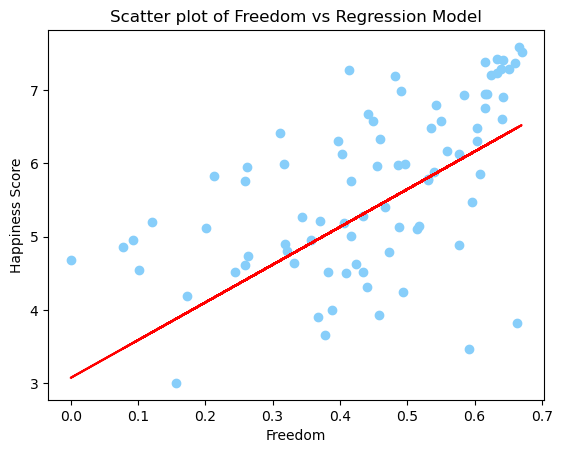

For variable Freedom:
Intercept: 3.075238506552976
Slope: [5.14334523]
R-squared: 0.22176599904224414
RMSE: 0.9948980189790082
--------------------------------------------------


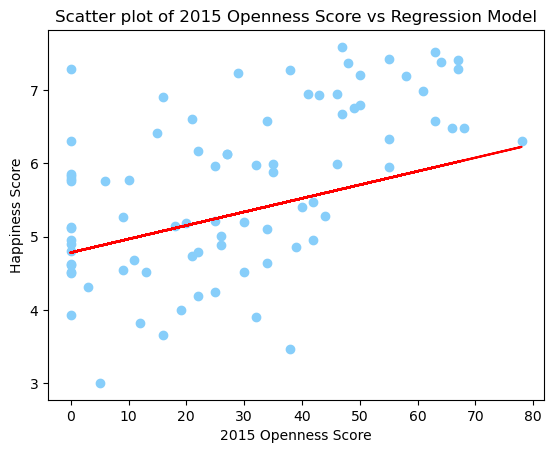

For variable 2015 Openness Score:
Intercept: 4.78275607505383
Slope: [0.01848143]
R-squared: 0.17304528408539133
RMSE: 1.0255676887633272
--------------------------------------------------


,Variable,R-squared,RMSE,R-squared (full dataset),RMSE (full dataset)
0,Economy (GDP per Capita),0.588985,0.723024,0.615278,0.716148
1,Family,0.511545,0.788198,0.543827,0.779820
2,Health (Life Expectancy),0.428941,0.852244,0.478396,0.833873
3,Freedom,0.221766,0.994898,0.262700,0.991406
4,2015 Openness Score,0.173045,1.025568,0.169755,1.052041


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

happy = df_merged.drop(columns=['Country', 'Region',
                               'Trust (Government Corruption)',
                                'Generosity',
                               'Dystopia Residual',
                               'Standard Error'])

print(happy.corr()['Happiness Score'])

independent_vars = ['Economy (GDP per Capita)', 
                    'Family', 
                    'Health (Life Expectancy)', 
                    'Freedom',
                   '2015 Openness Score']

results = []

for var in independent_vars:
    X = happy[var].values.reshape(-1, 1)
    y = happy['Happiness Score']

    # Split the test and train sets
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        train_size=0.3,
                                                        random_state=42)

    #Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    intercept = model.intercept_
    slope = model.coef_

    y_predicted_test = model.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, color = 'lightskyblue')
    plt.xlabel(var)
    plt.ylabel('Happiness Score')
    plt.title(f'Scatter plot of {var} vs Regression Model')
    plt.plot(X_test, y_predicted_test, color='red')
    plt.show()

    #Evaluate the model's performance with test/train split
    r_squared_test = r2_score(y_test, y_predicted_test)
    rmse_test = mean_squared_error(y_test, y_predicted_test, squared=False)

    #Evaluate the model's performance on the full dataset using the same model
    y_predicted_full = model.predict(X)

    r_squared_full = r2_score(y, y_predicted_full)
    rmse_full = mean_squared_error(y, y_predicted_full, squared=False)

    print(f'For variable {var}:')
    print(f'Intercept: {intercept}')
    print(f'Slope: {slope}')
    print(f'R-squared: {r_squared_test}')
    print(f'RMSE: {rmse_test}')
    print('-' * 50)
    
    results.append({'Variable': var, 
                    'R-squared': r_squared_test,
                    'RMSE': rmse_test,
                    'R-squared (full dataset)': r_squared_full,
                    'RMSE (full dataset)': rmse_full})
    
results_df = pd.DataFrame(results)
results_df

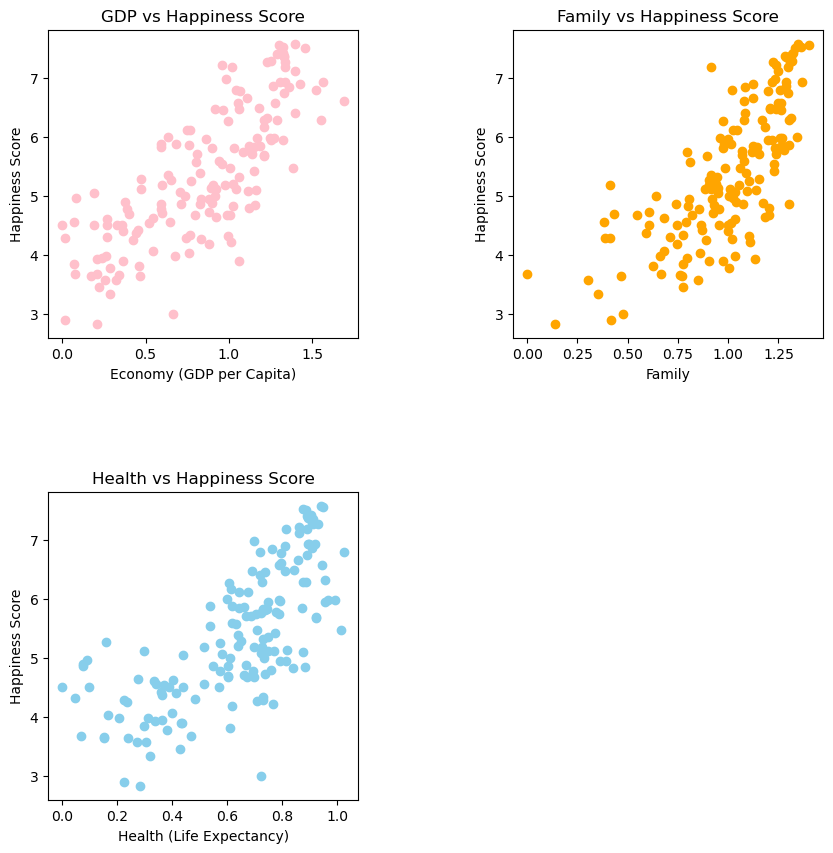

--------------------------------------------------
<Evaluate Model Perfomance>
RMSE: 0.57 
R-squared: 0.7279


In [33]:
X = happy[['Economy (GDP per Capita)', 'Family',\
           'Health (Life Expectancy)']]

y = happy['Happiness Score']

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(X['Economy (GDP per Capita)'], y, color='pink')
plt.title('GDP vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')

plt.subplot(2, 2, 2)
plt.scatter(X['Family'], y, color='orange')
plt.title('Family vs Happiness Score')
plt.xlabel('Family')
plt.ylabel('Happiness Score')

plt.subplot(2, 2, 3)
plt.scatter(X['Health (Life Expectancy)'], y, color='skyblue')
plt.title('Health vs Happiness Score')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

#Split the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.3,
                                                    random_state=42)

#Create and train the model
mlr_model = LinearRegression()
mlr_model.fit(X_train.values, y_train)
intercept = mlr_model.intercept_
slope = mlr_model.coef_

y_predicted = mlr_model.predict(X_test.values)

#Evaluate Model Perfomance

r_squared = r2_score(y_test, y_predicted)
rmse = mean_squared_error(y_test, y_predicted, squared = False)

print('-' * 50)
print('<Evaluate Model Perfomance>')
print(f'RMSE: {round(rmse,2)} \nR-squared: {round(r_squared,4)}')